# Multilayer Perceptron

### Implementing a Multilayer Perceptron in Python is very easy. Scikit is a library for Python used for data mining and analysis.

### The documentation for the MLPClassifier can be found <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html" target="_blank">here</a>.

# Part 1: Importing the data set

### Import your data as a pandas DataFrame. 

We will be using the animals.csv dataset which classifies whether an animal is a bird, crustacean, fish, insect, mammal or a toad. 

In [1]:
import pandas as pd

data = pd.read_csv('animals.csv')
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,2 legs,4 legs,5 legs,6 legs,8 legs,tail,domestic,catsize,class
0,0,1,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,birds
1,0,1,1,0,1,0,1,0,1,1,...,0,1,0,0,0,0,1,0,0,birds
2,0,1,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,birds
3,0,1,1,0,1,1,0,0,1,1,...,0,1,0,0,0,0,1,0,0,birds
4,0,1,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,birds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,1,0,0,0,1,1,1,1,...,0,0,1,0,0,0,1,0,0,saurian
97,0,0,1,0,0,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,toads
98,0,0,1,0,0,1,1,1,1,1,...,0,0,1,0,0,0,1,0,0,toads
99,0,0,1,0,0,1,0,1,1,1,...,0,0,1,0,0,0,0,0,0,toads


# Part 2: Preparing the data set for training and testing

### The classifier requires a training set and a test set. For each set, the column containing the class label must be separated from the actual data. Doing this step first also prevents the class label from being affected by normalization.

### The <code>drop</code> method removes a column given a header name. It is also important to include the <code>axis=1</code> parameter to indicate that a column is to be removed. If the said parameter is not specified, the method will attempt to delete a row.

In [2]:
x = data.drop('class',axis=1)
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,2 legs,4 legs,5 legs,6 legs,8 legs,tail,domestic,catsize
0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0
1,0,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0
3,0,1,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0
4,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0
97,0,0,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0
98,0,0,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0
99,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0


### To separate the class labels, extract the class labels column and assign it to a new DataFrame.

In [3]:
y = data['class']
y

0        birds
1        birds
2        birds
3        birds
4        birds
        ...   
96     saurian
97       toads
98       toads
99       toads
100      toads
Name: class, Length: 101, dtype: object

### Scikit also offers a method for easily splitting your data set into training set and test set so that you don't have to do it manually. This is done using <code>train_test_split()</code>.

### To specify the number of training data to be used, the following parameters are available:
<ul>
<li><code>train_size</code></li>
<li><code>test_size</code></li>
</ul>

In [4]:
from sklearn.model_selection import train_test_split

#70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)
x_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,2 legs,4 legs,5 legs,6 legs,8 legs,tail,domestic,catsize
91,1,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,1
45,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0
73,1,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0
9,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1
75,1,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,1
76,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1
90,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1
64,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1


### Before the actual learning process, the data must be normalized first. MLP works best if the data is scaled in terms of [0,1] or [-1,1] ranges. Scikit offers <code>MinMaxScaler</code> that allows scaling of the data.

In [5]:
from sklearn.preprocessing import MinMaxScaler

#Sigmoid activation
#scaler = MinMaxScaler(feature_range=(0,1))

#TANH activation
scaler = MinMaxScaler(feature_range=(-1,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 1., -1., -1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ..., -1.,  1., -1.],
       [ 1., -1., -1., ...,  1., -1., -1.],
       ...,
       [ 1., -1., -1., ...,  1., -1.,  1.],
       [ 1., -1., -1., ..., -1.,  1.,  1.],
       [-1.,  1.,  1., ...,  1., -1.,  1.]])

### MLP training can be accomplished using one line of code! Import the MLPClassifier from scikit and adjust the parameters to train the model.

### Some of the parameters are:
<ul>
<li><code>hidden_layer_sizes(x,y,z...)</code>: Each number included in the parameter indicated the number of hidden <em>nodes</em> for one hidden <em>layer</em></li>
<li><code>activation</code>: 'identity', 'logistic', 'tanh', 'relu'</li>
<li><code>max_iter</code>: an integer value representing the maximum number of training iterations</li>
<li><code>learning_rate_init</code>: a double value representing the learning rate to be used</li>
</ul>

In [6]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=10000,learning_rate_init=0.001,activation='tanh')
mlp.fit(x_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=5, max_iter=10000)

In [7]:
predictions = mlp.predict(x_test)

### Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:


In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9354838709677419

### With even this simple model, we find about 90% accuracy for classification of animals! However, this single number doesn't tell us where we've gone wrong—one nice way to do this is to use the confusion matrix, which we can compute with Scikit-Learn and plot with Seaborn:

Text(113.9222222222222, 0.5, 'true value')

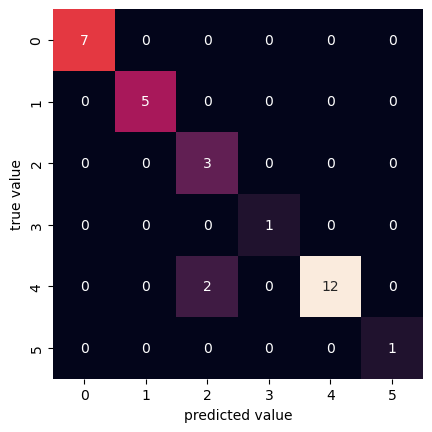

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test,predictions)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [10]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       birds       1.00      1.00      1.00         7
  crustacean       1.00      1.00      1.00         5
        fish       0.60      1.00      0.75         3
     insects       1.00      1.00      1.00         1
     mammals       1.00      0.86      0.92        14
       toads       1.00      1.00      1.00         1

    accuracy                           0.94        31
   macro avg       0.93      0.98      0.95        31
weighted avg       0.96      0.94      0.94        31



### Understanding the Classification report through sklearn

- The report shows the main classification metrics precision, recall and f1-score on a per-class basis. 
- The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes. 
- There are four ways to check if the predictions are right or wrong:

1. True Negative (TN): when a case was negative and predicted negative
2. True Positive (TP): when a case was positive and predicted positive
3. False Negative (FN): when a case was positive but predicted negative
4. False Positive (FP): when a case was negative but predicted positive

### Precision – What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

### Recall – What percent of the positive cases did you catch? 

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

### F1 score – What percent of positive predictions were correct? 

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Source: https://muthu.co/understanding-the-classification-report-in-sklearn/